In [142]:
import gym
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline

from lib.envs.gridworld import GridworldEnv # https://github.com/dennybritz/reinforcement-learning/blob/master/lib/envs/gridworld.py

env = GridworldEnv()

env.render()

T  o  o  o
x  o  o  o
o  o  o  o
o  o  o  T


# Value Iteration

![title](VI.png)

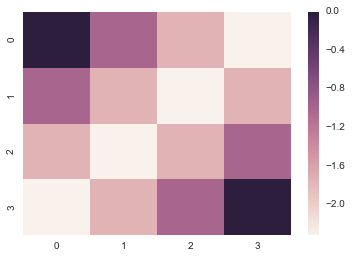

T  o  o  o
o  x  o  o
o  o  o  o
o  o  o  T


In [147]:
# 0 is left, 1 is down, 2 is right, and 3 is up

size = env.observation_space.n

V = np.zeros((size))
y = 0.75

epsilon = 1e-5

env.reset()

for i in range(0, 1000):
    delta = 0.0
    for s in range(0, env.observation_space.n):
        action_value = np.zeros((4))
        v = V[s]
        for a in env.P[s]:
            for p, s_new, r, term in env.P[s][a]:
                action_value[a] += p*(r + y * V[s_new])
        V[s] = np.max(action_value)
        delta = np.max((delta, np.abs(V[s]-v)))
    if delta<epsilon:
        break

size_sqrt = int(np.sqrt(size))
sns.heatmap(V.reshape((size_sqrt, size_sqrt)))
sns.plt.show()

env.render()

# Policy Iteration

![title](PI.png)

[[0 3 3 2]
 [0 0 0 2]
 [0 0 1 2]
 [0 1 1 0]]
[[ 0.   -1.   -1.5  -1.75]
 [-1.   -1.5  -1.75 -1.5 ]
 [-1.5  -1.75 -1.5  -1.  ]
 [-1.75 -1.5  -1.    0.  ]]
T  o  o  o
o  o  o  o
o  o  o  o
o  o  x  T


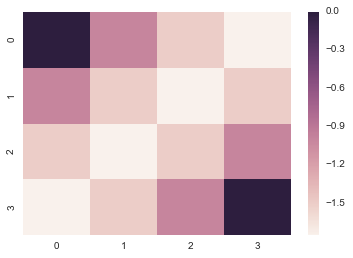

In [141]:
nb_actions = 4
nb_states = env.observation_space.n

prob = np.random.dirichlet(np.repeat(1, nb_actions), nb_states)

pi = np.argmax(prob, axis=1)

y = 0.5
env.reset()
epsilon = 1e-7

size = env.observation_space.n
import pdb


def policyEvaluation(pi, env):
    V = np.zeros((size))
    for i in range(0, 1000):
        delta = 0
        for s in range(0, env.observation_space.n):
            v = V[s]
            V[s] = 0
            a = pi[s]
            for p, s_new, r, term in env.P[s][a]:
                #pdb.set_trace()
                V[s] += p * (r + y*V[s_new])
            delta = np.max((delta, np.abs(V[s]-v)))
        if delta < epsilon:
            return V
            
def policyImprovement(pi, env):
    for i in range(0, 10000):
        policy_stable = True
        V = policyEvaluation(pi, env)
        for s in range(env.nS):
            old_action = pi[s]
            action_value = np.zeros((4))
            for a in range(env.nA):
                for p, s_new, r, term in env.P[s][a]:
                    action_value[a] += p*(r + y * V[s_new])

            pi[s] = np.argmax(action_value) # break tie by choosing smallest indice
            
            if old_action != pi[s]:
                policy_stable = False
                
        if policy_stable:
            return pi, V
            
env = GridworldEnv()            
pi_opt, V_opt = policyImprovement(pi, env)



size_sqrt = int(np.sqrt(nb_states))
print pi_opt.reshape((size_sqrt, size_sqrt))
print V_opt.reshape((size_sqrt, size_sqrt))
sns.heatmap(V_opt.reshape((size_sqrt, size_sqrt)))

env.render()

# 0 is left, 1 is down, 2 is right, and 3 is up

In [ ]:
def policyImprovement():
    pass

def partialPolicyImprovement():
    pass



![title](MPI.png)

![title](GS.png)

In [158]:
V = np.zeros((env.nS))
V_old = np.zeros((env.nS))

y = 0.9

for i in range(1000):
    for s in range(env.nS):
        action_value = np.zeros((env.nA))
        for a in range(env.nA):
            for p, s_new, r, term in env.P[s][a]:
                action_value[a] += p*r #+ y * V[s_new])
                if s_new < s: # i < j
                    action_value[a] += p*y*V[s_new]
                else: #i >= j
                    action_value[a] += p*y*V_old[s_new]
        V[s] = np.max(action_value)
    if np.linalg.norm((V-V_old),2) < epsilon: #* (1-y)/(2y)):
        break
    else:
        V_old = V
        
print V.reshape((4,4))

[[ 0.  -1.  -1.9 -1.9]
 [-1.  -1.9 -1.9 -1.9]
 [-1.9 -1.9 -1.9 -1. ]
 [-1.9 -1.9 -1.   0. ]]


In [174]:
import heapq

nums = []



heapq.heapify(nums)
print nums
print max(nums)

#print heapq.nlargest(1, nums)

[(90, 3), (100, 3)]
(100, 3)


![title](PSA.png)